# PyTorch workflow

- https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
import torch
from torch import nn ## nn contains building blocks

torch.__version__

'2.4.1+cu121'

In [ ]:
# use linear regression formula to make a straight line with known parameters

# Crete known parameters
weight = 0.7 # b
bias = 0.3 # a

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
### Splitting data into training and test sets
train_split_index = int(0.8*len(X))
X_train, y_train = X[:train_split_index], y[:train_split_index]
X_test, y_test = X[train_split_index:], y[train_split_index:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

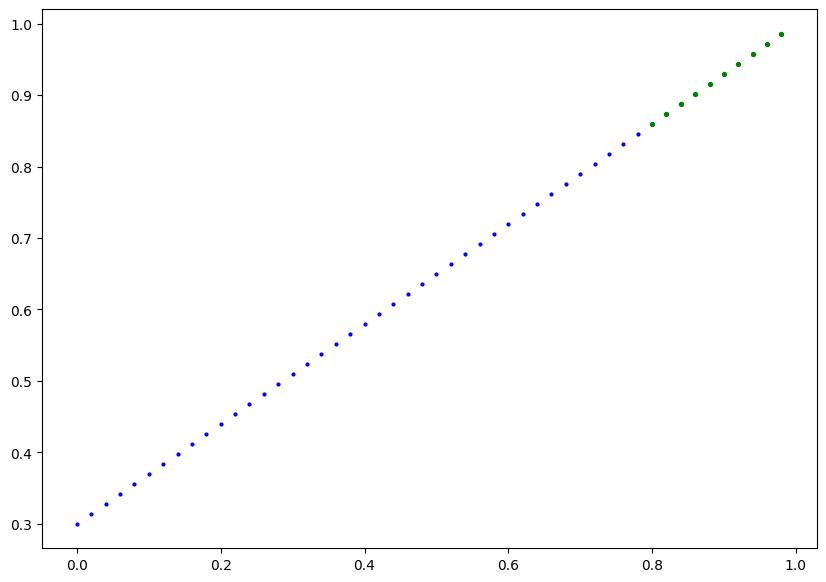

In [ ]:
from matplotlib import pyplot as plt
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data ni blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=8, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
from torch import nn

# Create linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, # size
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(
        1, # size
        requires_grad=True, # auto grad implements gradient descent
        dtype=torch.float
    ))

  def forward(self, x) -> torch.Tensor: # define forward computation in the model, overrides in the nn.Module class
    # any subclass of nn.Module needs to override the forward method
    return self.weights*x + self.bias


* torch.nn - building blocks for ocmputational graphs (a nn can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, PyTorch layer from torch.nn will set this for us
* torch.nn.Module - base class for all neural network modules, if you sub class it, you should override forward()
* torch.optim - where optimizers in PyTorch live, they will help with gradient descent. An optimizer starts with random values then adjust weights and bias that better represent our data.
* def forward() - this method defines what happens in the forward computation

* torch.utils.data.Dataset
* torch.utils.data.DataLoader

### CHecking contents of our PyTorch model

Now that we've created a model, let's see what's inside

check using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [ ]:
# List named paramters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
# Make prediction using torch.inference_mode()
# To check model's predictive power, let's see how it predicts y_test absed on X_test.

with torch.inference_mode(): # turns off gradient tracking
  y_predictions = model_0(X_test)

X_test, y_test, y_predictions

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.0677],
         [0.0853],
         [0.1030],
         [0.1206],
         [0.1382],
         [0.1559],
         [0.1735],
         [0.1912],
         [0.2088],
         [0.2265]]))

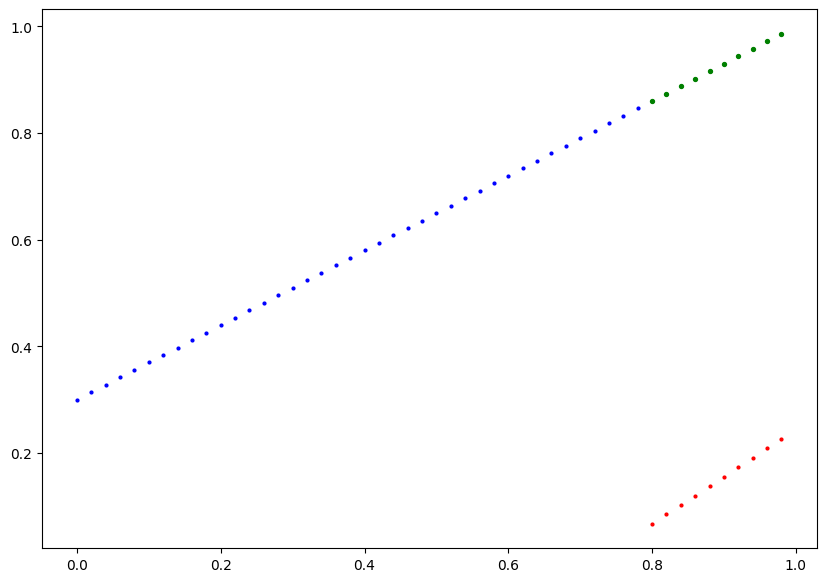

In [ ]:
plot_predictions(predictions=y_predictions)

* loss functions = cost function = criterion
* loss function is a function to measure how wrong your model's predictions are to ideal outputs
* L1 loss (mean absolute error) and MSE loss (mean squared error) used for regression

* optimizer - takes account of loss of model and adjusts the model's parameters (e.g. weight and biases)


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [ ]:
# Set up a loss function
loss_fn = nn.L1Loss()
# measures how wrong model is

In [ ]:
# Set up an optimizer
optimizer = torch.optim.SGD(  # stochastic gradient descent
    params=model_0.parameters(), # the things that the optimizer is going to change
    lr=0.01) # learning rate (Default is 0.1 for SGD), it is a hyper parameter (something that we set, parameters are something that the NN changes)

###  Build a training loop and a testing loop

#### For the Training Loop
0. Loop through the data
1. Forward pass (this involves data moving through model's `forward()` functions) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero gradient
4. Loss backward (backward propagataion) - move backwards through the NN to calculate the gradients of each of the paramters of our model with the respect to the loss
5. Optimizer step - use optimizer to adjust model's parameters to try and improve the loss

#### For the Testing Loop


In [ ]:
torch.manual_seed(42)

# epoch is one loop through the data
epochs = 1000

# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training model
  model_0.train() # sets all require gradients to require gradients

  # 1. Fowrad pass

  # print(X_train)
  # print(y_train)
  y_preds = model_0(X_train)
  # print(y_preds)

  # 2. Calculate loss
  loss = loss_fn(y_preds, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on oss with respect to parameters of the model
  loss.backward()

  # 5. Step optimizer (perform gradient descent)
  optimizer.step()

  model_0.eval() # turns off settings that are unneeded for evaluation/testing
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)
    print(model_0.state_dict())

OrderedDict([('weights', tensor([0.8862])), ('bias', tensor([-0.6282]))])
OrderedDict([('weights', tensor([0.8901])), ('bias', tensor([-0.6182]))])
OrderedDict([('weights', tensor([0.8940])), ('bias', tensor([-0.6082]))])
OrderedDict([('weights', tensor([0.8979])), ('bias', tensor([-0.5982]))])
OrderedDict([('weights', tensor([0.9018])), ('bias', tensor([-0.5882]))])
OrderedDict([('weights', tensor([0.9057])), ('bias', tensor([-0.5782]))])
OrderedDict([('weights', tensor([0.9096])), ('bias', tensor([-0.5682]))])
OrderedDict([('weights', tensor([0.9135])), ('bias', tensor([-0.5582]))])
OrderedDict([('weights', tensor([0.9174])), ('bias', tensor([-0.5482]))])
OrderedDict([('weights', tensor([0.9213])), ('bias', tensor([-0.5382]))])
OrderedDict([('weights', tensor([0.9252])), ('bias', tensor([-0.5282]))])
OrderedDict([('weights', tensor([0.9291])), ('bias', tensor([-0.5182]))])
OrderedDict([('weights', tensor([0.9330])), ('bias', tensor([-0.5082]))])
OrderedDict([('weights', tensor([0.936

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7083])), ('bias', tensor([0.3038]))])

In [ ]:
weight, bias

(0.7, 0.3)

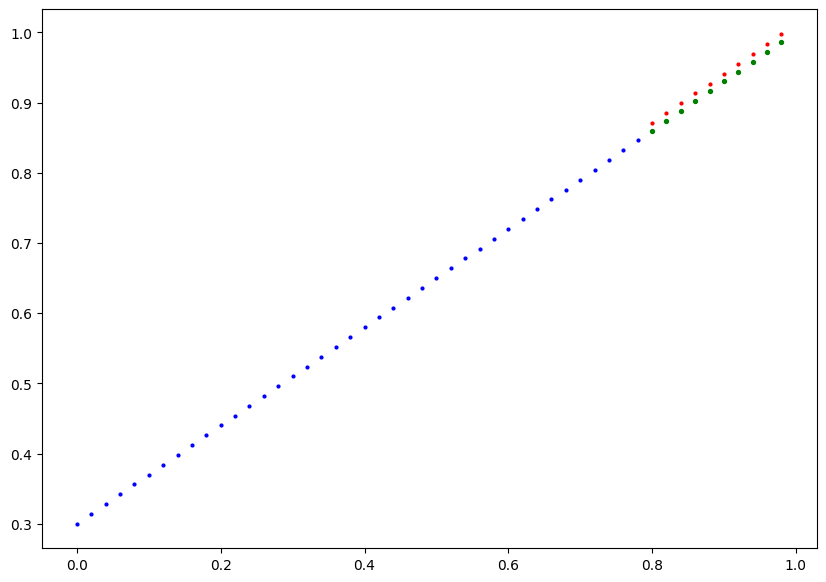

In [ ]:
with torch.no_grad():
  y_preds = model_0(X_test)

  plot_predictions(predictions=y_preds)

In [ ]:
# Saving a model in PyTorch
# 1. torch.save() --> save PyTorch object in Python's pickle format
# 3. torch.n.Module.load_State_dict()

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7083])), ('bias', tensor([0.3038]))])

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
print(f"Saving model to {MODEL_SAVE_PATH}")

torch.save(
    obj=model_0.state_dict(),
    f=MODEL_SAVE_PATH
)

Saving model to models/model_0.pth


In [ ]:
!cat models/model_0.pth

PK                      model_0/data.pklFB ZZZZZZZZZZZZZZ�ccollections
OrderedDict
q )Rq(X   weightsqctorch._utils
_rebuild_tensor_v2
q((X   storageqctorch
FloatStorage
qX   0qX   cpuqKtqQK K�q	K�q
X   biasqh((hhX   1qhKtqQK K�qK�q�h )RqtqRqu}qX	   _metadataqh )RqX    q}qX   versionqKsssb.PK<&�B    PK                     " model_0/byteorderFB ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZlittlePK�=�      PK                     > model_0/data/0FB: ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ�R5?PK%�8      PK                     @ model_0/data/1FB< ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ���>PK=�      PK                     ? model_0/versionFB; ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ3
PKўgU      PK                     2 model_0/.data/serialization_idFB. ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ1326306869893853080500068584481843960052PK�V�J(   ( 

In [ ]:
# Load

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
print(f"Loading model from {MODEL_SAVE_PATH}")

model_0 = LinearRegressionModel()

model_0.load_state_dict(torch.load(
    weights_only=True,
    f=MODEL_SAVE_PATH,
))

model_0.state_dict()

Loading model from models/model_0.pth


OrderedDict([('weights', tensor([0.7083])), ('bias', tensor([0.3038]))])

Putting it al together

In [ ]:
from torch import nn
import torch
from matplotlib import pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


In [ ]:
# 1. Set up data

weight = 0.7
bias = 0.3

# Create X_train, X_test, y_train, y_test
start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step)
y = 0.7*x + 0.3

split_index = int(len(x)*0.70)

X_train = x[:split_index] # up to 0.68, inclusive
X_test = x[split_index:] # 0.70 and beyond, inclusive

y_train = y[:split_index]
y_test = y[split_index:]

X_train = X_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)
y_train = y_train.unsqueeze(1)
y_test = y_test.unsqueeze(1)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

X_train[:5], X_test[:5], y_train[:5], y_test[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]], device='cuda:0'),
 tensor([[0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]], device='cuda:0'),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]], device='cuda:0'),
 tensor([[0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460]], device='cuda:0'))

In [ ]:
# Plot Predictions function
def plot_predictions(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, predictions=None):
  plt.scatter(X_train, y_train, s=1, c="b")
  plt.scatter(X_test, y_test, s=1, c="g")

  if predictions is not None:
    plt.scatter(X_test, predictions, s=1, c="r")


In [ ]:
# 2. Build and Pick a Model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
     super().__init__()

     self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor):
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1 = model_1.to(device)
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [ ]:
# Loss Function
loss_fn = nn.L1Loss() # MAE (mean absolute error)

# Optimizer
optimizer = torch.optim.SGD(
    params=model_1.parameters(),
    lr=0.01
)

In [ ]:
# Training Loop

torch.manual_seed(42)

epochs = 50

for epoch in range(epochs):
  # 0. Put in training mode
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  MAE_loss = loss_fn(y_pred, y_train)

  # 3. Optimizer Zero Gradient
  optimizer.zero_grad()

  # 4. backward proparagation
  MAE_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Do a Test
  if epoch % 10 == 0:
    model_1.eval()
    with torch.inference_mode():
      test_predictions = model_1(X_test)
      test_loss = loss_fn(test_predictions, y_test)
      print(f"Epoch: {epoch} | Loss: {MAE_loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.551950991153717 | Test Loss: 0.5713642835617065
Epoch: 10 | Loss: 0.44039100408554077 | Test Loss: 0.44280412793159485
Epoch: 20 | Loss: 0.3288309872150421 | Test Loss: 0.31424400210380554
Epoch: 30 | Loss: 0.21727101504802704 | Test Loss: 0.18568386137485504
Epoch: 40 | Loss: 0.10571100562810898 | Test Loss: 0.057123709470033646


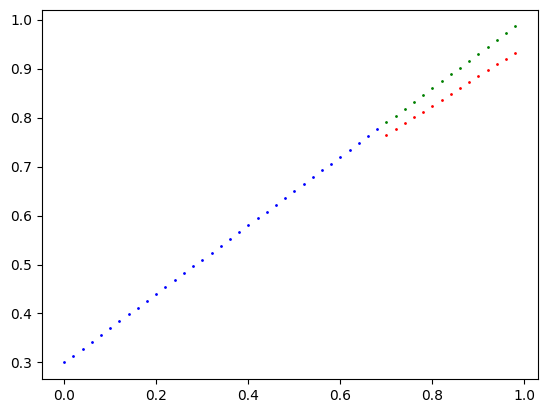

In [ ]:
### Testing
model_1.eval()
with torch.inference_mode():
  test_pred = model_1(X_test)

  test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

  plot_predictions(predictions=test_pred.cpu())

OrderedDict([('linear_layer.weight', tensor([[0.6936]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3060], device='cuda:0'))])

In [ ]:
torch.save(obj=model_1.state_dict(), f=MODEL_PATH/"model_1.pth")

<ipython-input-172-6a2deb9fee78>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_1.load_state_dict(torch.load(f=MODEL_PATH/"model_1.pth"))


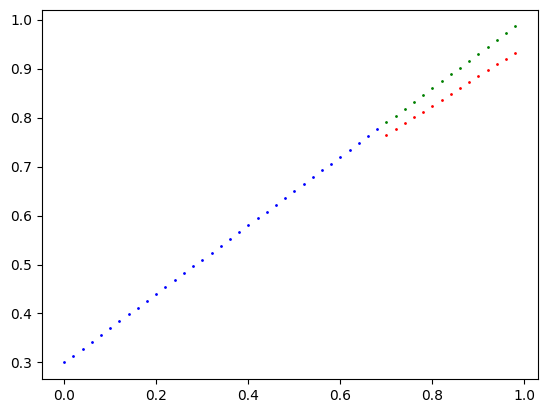

In [ ]:
model_1.load_state_dict(torch.load(f=MODEL_PATH/"model_1.pth"))

with torch.inference_mode():
  y_preds = model_1(X_test)
  plot_predictions(predictions=y_preds.cpu())